In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\zuhai\anaconda3\envs\AI\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [5]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

# Starting random imputation

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train['age_imputed']=X_train['Age']
X_test['age_imputed']=X_test['Age']

In [9]:
X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['age_imputed'][X_test['age_imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [10]:
#Understanding this code
X_train['age_imputed'] #selecting age_imputred column


30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
534    30.0
584    31.0
493    71.0
527    18.0
168    24.0
Name: age_imputed, Length: 712, dtype: float64

In [12]:
X_train['age_imputed'].isnull() #finding null values places in age_imputed

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584    False
493    False
527    False
168    False
Name: age_imputed, Length: 712, dtype: bool

In [13]:
X_train['Age'].dropna() #dropping null values from the Age column and selecting remainig values

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
360    40.0
75     25.0
299    50.0
534    30.0
493    71.0
Name: Age, Length: 564, dtype: float64

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values #in this code by using sample method
# we are calculating the number of samples for random values

array([30. , 44. , 44. , 27. , 50. , 31. , 24. , 22. , 14. , 40. , 31. ,
       48. , 21. , 14. , 39. , 27. , 17. ,  1. , 34. , 40. , 28. , 21. ,
       26. , 28. , 21. , 32. , 36. , 22. , 20. , 11. , 28. , 46. , 14. ,
       40. , 18. , 26. , 36. , 34. , 54. , 27. , 30. , 29. , 25. , 21. ,
       21. , 36. , 24. , 36. , 32.5, 42. , 44. , 45. , 45. , 30. , 37. ,
       41. , 16. , 29. , 20. , 32. , 56. , 65. , 58. , 32. , 40. , 21. ,
       58. , 33. , 36. , 19. , 33. , 28.5, 19. , 35. , 45. , 23. ,  2. ,
       52. , 43. , 50. , 29. ,  4. , 56. , 34. , 20. , 54. , 39. , 19. ,
       36.5, 13. , 31. , 28. ,  4. , 22. , 29. , 37. , 16. , 16. , 34. ,
       44. , 17. , 26. , 29. , 36. , 24. , 38. , 30. ,  8. , 36. , 26. ,
       45.5, 40. , 31. , 35. , 18. , 34. , 43. , 31. , 28. , 31. , 34. ,
       30. , 50. , 66. , 48. , 31. , 45. , 37. , 44. , 30. , 53. , 61. ,
       23. , 50. , 21. , 47. , 35. , 38. , 27. , 24. , 16. , 35. , 17. ,
        9. , 30. , 20. , 24. , 25. ])

# verifying the benefits

C:\Users\zuhai\AppData\Local\Temp\ipykernel_3884\1850881738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\zuhai\AppData\Local\Temp\ipykernel_3884\1850881738.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['a

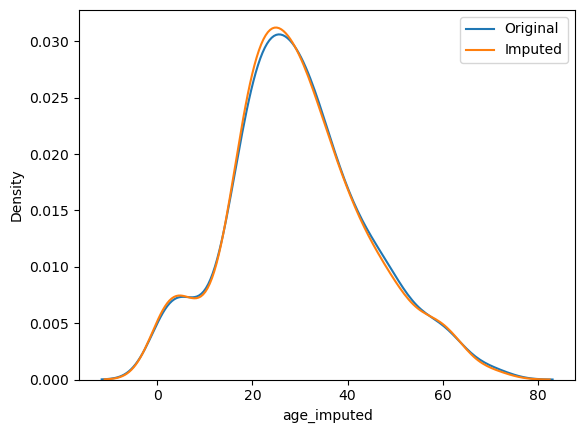

In [16]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [18]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  202.0819656947803


# checking for disadvantages

In [21]:
X_train[['Fare', 'Age', 'age_imputed']].cov(10)

,Fare,Age,age_imputed
Fare,2368.246832,71.512440,56.609723
Age,71.512440,204.349513,204.349513
age_imputed,56.609723,204.349513,202.081966


# checking is this technique effects the outliers

<AxesSubplot: >

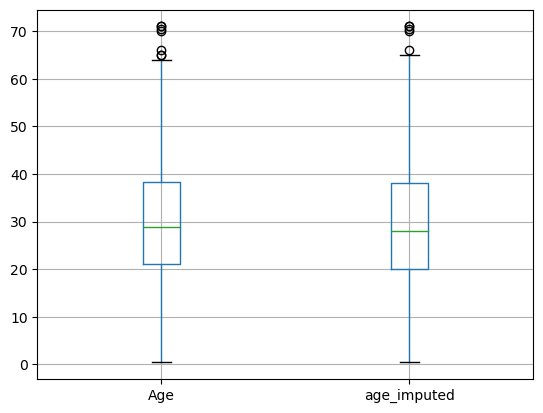

In [23]:
X_train[['Age', 'age_imputed']].boxplot()

In [25]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
# this code is used in production further explanation is present on notes

# random imputation in categorical data

In [28]:
data = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [27]:
data.head(10)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
5,NaN,TA,143000
6,Gd,TA,307000
7,TA,TA,200000
8,TA,Fa,129900
9,TA,Gd,118000


In [29]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [30]:
X = data
y = data['SalePrice']

# train test split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [33]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\zuhai\AppData\Local\Temp\ipykernel_3884\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\zuhai\AppData\Local\Temp\ipykernel_3884\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\zuhai\AppData\Local\Temp\ipykernel_3884\856878696.py:4: SettingWithCopyWarning: 
A value

In [34]:
#code explanation is same

In [37]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']


#checking frequency for GarageQual column

In [38]:
temp

,original,imputed
TA,0.951043,0.953767
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [41]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(data)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.393151
TA,0.412439,0.330822
Fa,0.040917,0.032877
Po,0.027823,0.023288
Ex,0.024550,0.019863


In [40]:
#as you can see frequency of FireplaceQu is very so random imputation does not work well for this column
#we will not apply this 